# __Датасет содержит данные о пингвинах архипелага Палмера (Антарктида).__

Данные были собраны и предоставлены доктором Dr. Kristen Gorman и станцией Палмера, Антарктида. 
Датасет содержит информацию о структурных размерах тела пингвинов и некоторые характеристики среди взрослых самцов и самок пингвинов:
- Адели (Pygoscelis adeliae)

- Субантарктических пингвинов (Pygoscelis papua)

- Антарктических пингвинов (Pygoscelis antarctica).


In [1]:
#импорт необходимых модулей
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
import plotly.figure_factory as ff

from itertools import cycle
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
penguin = pd.read_csv('penguins_size.csv')

In [3]:
penguin.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguin.shape

(344, 7)

In [5]:
penguin.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

__Набор данных состоит из 344 строк и 7 столбцов:__

- species  (object) - виды пингвинов  (Chinstrap - Антарктический пингвин; Adélie - Пингвин Адели; Gentoo - Субантарктический пингвин).


- culmen_length_mm (float64) - длина надклювья (мм)


__culmen - это «верхний гребень птичьего клюва», буду использовать как «надклювье».__


- culmen_depth_mm (float64) - толщина надклювья (мм)


- flipper_length_mm (float64) - длина плавника (мм)


- body_mass_g (float64) - масса тела (г)


- island (object) - название острова (Dream, Torgersen, или Biscoe) в архипелаге Палмера (Антарктида)


- sex (object) - пол пингвинов

## Поиск информации о типах данных, столбцах и нулевых значениях

In [6]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
penguin.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

В столбцах culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g и sex есть несколько нулевых значений.

Очистим пропущенные значения. Столбцы culmen_length_mm, culmen_depth_mm, flipper_length_mm и body_mass_g являются числовыми переменными, поэтому вычислим среднее значение для каждого столбца и заменим отсутствующие значения средним.

In [8]:
mean_culmen_length = round(penguin['culmen_length_mm'].mean(),1)
mean_culmen_depth = round(penguin['culmen_depth_mm'].mean(),1)
mean_flipper_length = round(penguin['flipper_length_mm'].mean(),1)
mean_body_mass = round(penguin['body_mass_g'].mean(),1)

print("mean_culmen_length : ", mean_culmen_length)
print("mean_culmen_depth :", mean_culmen_depth)
print("mean_flipper_length :",mean_flipper_length)
print("mean_body_mass :",mean_body_mass)

mean_culmen_length :  43.9
mean_culmen_depth : 17.2
mean_flipper_length : 200.9
mean_body_mass : 4201.8


После вычисления среднего значения для каждого столбца я заменю отсутствующие значения с помощью метода «.replace()».

Для первого аргумента нужно определить, что нужно заменить. Итак, в этом случае я хочу заменить отсутствующие значения - нужно поставить np.nan в качестве первого аргумента, чтобы сообщить функции, что мы хотим заменить отсутствующие значения.

Для второго аргумента нужно определить, чем я хочу заменить отсутствующие значения. В этом случае - отсутствующие значения, которые я вычислила в предыдущей ячейке кода.

И для третьего аргумента, так как я хочу заменить отсутствующие значения в объекте penguin, не создавая новый объект, я установлю аргумент inplace как true, чтобы метод replace заменял отсутствующие значения в объекте penguin.

In [9]:
penguin['culmen_length_mm'].replace(np.nan , mean_culmen_length , inplace=True)
penguin['culmen_depth_mm'].replace(np.nan , mean_culmen_depth , inplace=True)
penguin['flipper_length_mm'].replace(np.nan , mean_flipper_length , inplace=True)
penguin['body_mass_g'].replace(np.nan , mean_body_mass , inplace=True)

penguin.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

Теперь отсутствующие числовые переменные уже заменены. Для переменной пола я не буду удалять строки, содержащие отсутствующую переменную пола, а заменю значения на преобладающие по датасету.

In [10]:
penguin['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [11]:
penguin['sex'].replace(np.nan ,'MALE', inplace=True)
penguin.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Теперь в наборе данных нет нулевых значений. Итак, мы можем продолжить работу над EDA.

Посмотрим на уникальные значения в категориальных столбцах.

In [13]:
penguin['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
penguin['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

Колонка пола имеет пропущенное значение "." Найдем, где "." - значение пола.

In [16]:
penguin[penguin['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [17]:
#Заменим на преобладающее значение
penguin.loc[336,'sex'] = 'MALE'

In [18]:
penguin.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

__Описательная статистика__

In [19]:
penguin.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921802,17.151453,200.915116,4201.754651
std,5.443644,1.969031,14.020658,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


__Исследовательский анализ данных:__

В этой части я собираюсь исследовать три основных вопроса, касающихся этого набора данных.

__1. Существует ли какая-либо корреляция между толщиной и длиной надклювья каждого вида пингвинов?__


__2. Есть ли разница в длине плавника у пингвинов на разных островах? Или у видов пингвинов?__ 


__3. Различаются ли в среднем масса тела и длина плавника у представителей разного пола? Если да, то насколько? Для обоих полов имеет ли масса тела какую-либо корреляцию с длиной плавника?__

Вопрос 1: Толщина надклювья по сравнению с длиной надклювья для видов.

Во-первых, посмотрим, общие характеристики для каждого вида.

In [20]:
penguin['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Есть 152 пингвина Адели, 124 Субантарктический пингвин и 68 Антарктических пингвинов.

In [31]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=1, 
    cols=3,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Вид",
        "Остров",
        "Пол"],
        specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
        vertical_spacing = 0.1
)

species_counts = penguin.species.value_counts()

species_p = go.Pie(
    labels=species_counts.index,
    values=species_counts,
    name="Виды",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(species_counts))],
    legendgroup="Вид",
    legendgrouptitle_text="Вид",
)

island_counts = penguin.island.value_counts()

island = go.Pie(
    labels=island_counts.index,
    values=island_counts,
    name="Остров",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(island_counts))],
    legendgroup="Остров",
    legendgrouptitle_text="Остров",
)

sex_counts = penguin.sex.value_counts()

sex = go.Pie(
    labels=sex_counts.index,
    values=sex_counts,
    name="Пол",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(sex_counts))],
    legendgroup="Пол",
    legendgrouptitle_text="Пол",
)

fig.add_trace(species_p, row=1, col=1)
fig.update_xaxes(title_text="Вид", row=1, col=1)
fig.update_yaxes(title_text="Количество", row=1, col=1)

fig.add_trace(island, row=1, col=2)
fig.update_xaxes(title_text="Остров", row=1, col=2)
fig.update_yaxes(title_text="Количество", row=1, col=2)

fig.add_trace(sex, row=1, col=3)
fig.update_xaxes(title_text="Пол", row=1, col=3)
fig.update_yaxes(title_text="Количество", row=1, col=3)

fig.update_layout(
    template="plotly",
    height=430,
)

fig.update(
    layout_title_text="Характеристики пингвинов",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(220, 237, 247)',
    layout_plot_bgcolor='rgb(220, 237, 247)',
)

fig.show()

- Адели занимают первое место, за ними следуют Gentoo (Субантарктические пингвины) и Chinstrap (Антарктические пингвины).


- Большинство пингвинов принадлежат острову Биско, а меньше всего — Торгерсену.

Распределение характеристик пингвинов

In [37]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=2, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Длина надклювья",
        "Толщина надклювья",
        "Длина плавника",
        "Масса тела"],
        vertical_spacing = 0.1
)

culmen_length_mm = go.Histogram(
    x=penguin.culmen_length_mm,
    name="Длина надклювья",
    marker_color=next(palette),
    legendgroup="Длина надклювья",
    legendgrouptitle_text="Длина надклювья",
)

culmen_depth_mm = go.Histogram(
    x=penguin.culmen_depth_mm,
    name="Толщина надклювья",
    marker_color=next(palette),
    legendgroup="Толщина надклювья",
    legendgrouptitle_text="Толщина надклювья",
)

flipper_length_mm = go.Histogram(
    x=penguin.flipper_length_mm,
    name="Длина плавника",
    marker_color=next(palette),
    legendgroup="Длина плавника",
    legendgrouptitle_text="Длина плавника",
)

body_mass_g = go.Histogram(
    x=penguin.body_mass_g,
    name="Масса тела",
    marker_color=next(palette),
    legendgroup="Масса тела",
    legendgrouptitle_text="Масса тела",
)

fig.add_trace(culmen_length_mm, row=1, col=1)
fig.update_xaxes(title_text="Длина надклювья", row=1, col=1)
fig.update_yaxes(title_text="Количество", row=1, col=1)

fig.add_trace(culmen_depth_mm, row=1, col=2)
fig.update_xaxes(title_text="Толщина надклювья", row=1, col=2)
fig.update_yaxes(title_text="Количество", row=1, col=2)

fig.add_trace(flipper_length_mm, row=2, col=1)
fig.update_xaxes(title_text="Длина плавника", row=2, col=1)
fig.update_yaxes(title_text="Количество", row=2, col=1)

fig.add_trace(body_mass_g, row=2, col=2)
fig.update_xaxes(title_text="Масса тела", row=2, col=2)
fig.update_yaxes(title_text="Количество", row=2, col=2)

fig.update_layout(
    template="plotly",
    height=1000,
)

fig.update(
    layout_title_text="Распределение характеристик пингвинов",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

Связь по признакам

In [38]:
fig = px.scatter_matrix(penguin, 
                        dimensions=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"], 
                        color="species")

fig.update_layout(template="plotly", height=800)

fig.update(
    layout_title_text="Связь между признаками по видам",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)
fig.show()

In [39]:
fig = px.scatter_matrix(penguin, 
                        dimensions=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"], 
                        color="sex")

fig.update_layout(template="plotly", height=800)

fig.update(
    layout_title_text="Связь между признаками по полу",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)
fig.show()

Распределение переменных по видам

In [41]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=2, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Длина надклювья",
        "Толщина надклювья",
        "Длина плавника",
        "Масса тела",],
        vertical_spacing = 0.1
)

culmen_length_mm_box = go.Box(
    x = penguin.species,
    y = penguin.culmen_length_mm,
    name="Длина надклювья",
    legendgroup="Длина надклювья",
    legendgrouptitle_text="Длина надклювья",
    marker_color=next(palette),
)

culmen_depth_mm_box = go.Box(
    x = penguin.species,
    y = penguin.culmen_depth_mm,
    name="Толщина надклювья",
    legendgroup="Толщина надклювья",
    legendgrouptitle_text="Толщина надклювья",
    marker_color=next(palette),
)

flipper_length_mm_box = go.Box(
    x = penguin.species,
    y = penguin.flipper_length_mm,
    name="Длина плавника",
    legendgroup="Длина плавника",
    legendgrouptitle_text="Длина плавника",
    marker_color=next(palette),
)

body_mass_g_box = go.Box(
    x = penguin.species,
    y = penguin.body_mass_g,
    name="Масса тела",
    legendgroup="Масса тела",
    legendgrouptitle_text="Масса тела",
    marker_color=next(palette),
)


fig.add_trace(culmen_length_mm_box, row=1, col=1)
fig.update_xaxes(title_text="Длина надклювья", row=1, col=1)

fig.add_trace(culmen_depth_mm_box, row=1, col=2)
fig.update_xaxes(title_text="Толщина надклювья", row=1, col=2)

fig.add_trace(flipper_length_mm_box, row=2, col=1)
fig.update_xaxes(title_text="Длина плавника", row=2, col=1)

fig.add_trace(body_mass_g_box, row=2, col=2)
fig.update_xaxes(title_text="Масса тела", row=2, col=2)

fig.update_layout(template="plotly", height=800)

fig.update(
    layout_title_text="Распределение переменных по видам",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

Распределение переменных по полу

In [42]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=2, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Длина надклювья",
        "Толщина надклювья",
        "Длина плавника",
        "Масса тела",],
        vertical_spacing = 0.1
)

culmen_length_mm_box = go.Box(
    x = penguin.sex,
    y = penguin.culmen_length_mm,
    name="Длина надклювья",
    legendgroup="Длина надклювья",
    legendgrouptitle_text="Длина надклювья",
    marker_color=next(palette),
)

culmen_depth_mm_box = go.Box(
    x = penguin.sex,
    y = penguin.culmen_depth_mm,
    name="Толщина надклювья",
    legendgroup="Толщина надклювья",
    legendgrouptitle_text="Толщина надклювья",
    marker_color=next(palette),
)

flipper_length_mm_box = go.Box(
    x = penguin.sex,
    y = penguin.flipper_length_mm,
    name="Длина плавника",
    legendgroup="Длина плавника",
    legendgrouptitle_text="Длина плавника",
    marker_color=next(palette),
)

body_mass_g_box = go.Box(
    x = penguin.sex,
    y = penguin.body_mass_g,
    name="Масса тела",
    legendgroup="Масса тела",
    legendgrouptitle_text="Масса тела",
    marker_color=next(palette),
)

fig.add_trace(culmen_length_mm_box, row=1, col=1)
fig.update_xaxes(title_text="Длина надклювья", row=1, col=1)

fig.add_trace(culmen_depth_mm_box, row=1, col=2)
fig.update_xaxes(title_text="Тольщина надклювья", row=1, col=2)

fig.add_trace(flipper_length_mm_box, row=2, col=1)
fig.update_xaxes(title_text="Длина плавника", row=2, col=1)

fig.add_trace(body_mass_g_box, row=2, col=2)
fig.update_xaxes(title_text="Масса тела", row=2, col=2)

fig.update_layout(template="plotly", height=1000)

fig.update(
    layout_title_text="Распределение переменных по полу",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

- У Антарктических пингвинов самая большая длина надклювья как у самцов, так и у самок, за ними следуют Субантарктические пингвины и Адели.


- Антарктические пингвины и пингвины Адели имеют почти одинаковую толщину надклювья как у самцов, так и у самок, в то время как у Папунских пингвинов самая маленькая толщина.


- У Папуасских пингвинов самая большая длина плавника как у самцов, так и у самок.


- У Папуасских пингвинов самая большая масса тела как у самцов, так и у самок.

__Корреляционный анализ переменных__

In [45]:
corr_mat = penguin.corr()
corr_mat

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583850,-0.471915
flipper_length_mm,0.656181,-0.583850,1.000000,0.871202
body_mass_g,0.595110,-0.471915,0.871202,1.000000


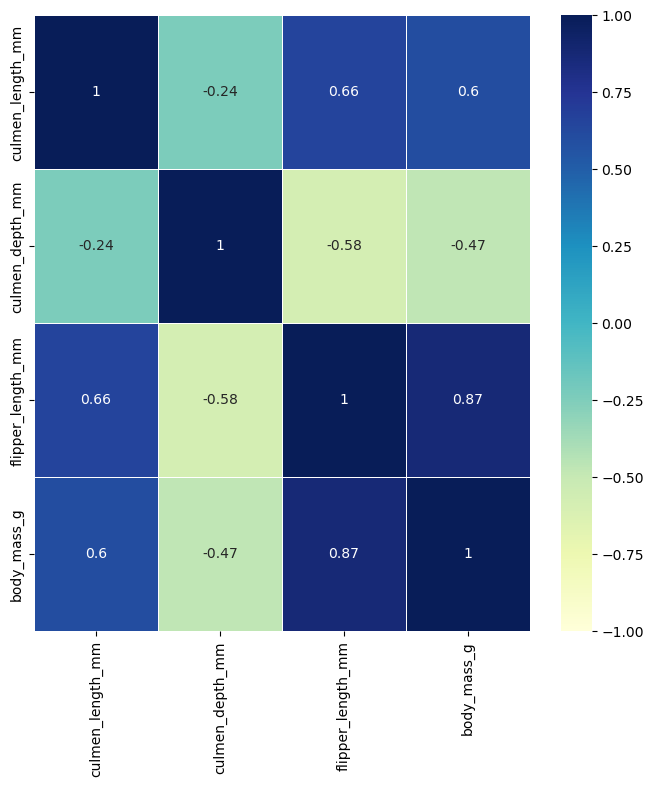

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(penguin.corr(), vmin=-1, cmap="YlGnBu", annot=True, linewidths=.5);

Длина плавника и масса тела сильно зависят друг от друга со значением корреляции 0,87. Другими словами, пингвины с более длинными плавниками обычно весят больше.

Теперь разделим наших пингвинов на разные группы, используя переменную массы тела в качестве критерия.

Чтобы разделить пингвинов на разные группы с помощью массы тела, нужно сгенерировать четыре разных числа из переменной массы тела, которые находятся на одинаковом расстоянии, и использовать эти четыре числа для объединения наших пингвинов.

Я разделю пингвинов на 3 разные группы: маленькую, среднюю и большую.

Чтобы сгенерировать числа, которые находятся на одинаковом расстоянии, я буду использовать функцию «np.linspace()».

Чтобы использовать функцию «np.linspace()», необходимо установить три аргумента, нужно установить диапазон номеров и указать, сколько номеров хотим сгенерировать.

В этом случае я хочу разделить пингвинов на 3 разные группы, используя переменные массы тела, поэтому диапазон чисел, которые я буду генерировать, будет от минимальной массы тела до максимальной массы тела.

In [49]:
bin = np.linspace(penguin['body_mass_g'].min(),penguin['body_mass_g'].max(),4)
label_names = ['small' , 'medium' , 'large']
print(bin)

[2700. 3900. 5100. 6300.]


В результате выполнения кода мы получаем четыре разных равноудаленных числа.


- Если масса тела пингвинов составляет от 2700 до 3900, они будут объединены в маленькую группу.


- Если масса тела пингвинов находится между 3900 и 5100, они будут отнесены к средней группе.


- Если масса тела пингвинов находится между 5100 и 6300, они будут объединены в большую группу.

Итак, чтобы объединить пингвинов в группы, я воспользуюсь функцией «pd.cut()» и создам новый столбец с именем size.
Для первых аргументов нужно указать, какую переменную хотим использовать для хранения данных. Второй аргумент — это число, которое хотим использовать для хранения данных. И третий аргумент — это метка группы, в которую хоти поместить свои данные.

In [50]:
penguin['size'] = pd.cut(penguin['body_mass_g'] , bin , labels = label_names )
penguin.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,size
203,Chinstrap,Dream,51.4,19.0,201.0,3950.0,MALE,medium
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,MALE,medium
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,small
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE,medium
43,Adelie,Dream,44.1,19.7,196.0,4400.0,MALE,medium
315,Gentoo,Biscoe,50.8,15.7,226.0,5200.0,MALE,large
318,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,FEMALE,medium
164,Chinstrap,Dream,47.0,17.3,185.0,3700.0,FEMALE,small
290,Gentoo,Biscoe,47.7,15.0,216.0,4750.0,FEMALE,medium
288,Gentoo,Biscoe,43.5,14.2,220.0,4700.0,FEMALE,medium


Посмотрим сколько пингвинов находится в каждой ячейке, используя гистограмму.

Text(0, 0.5, 'total')

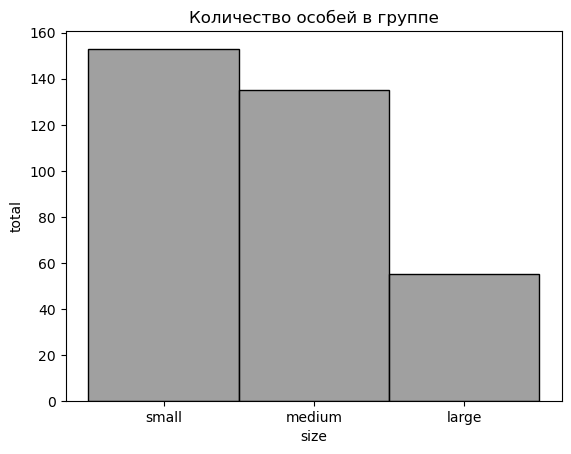

In [53]:
sns.histplot(data = penguin , x = 'size',color = 'grey')
plt.title("Количество особей в группе")
plt.xlabel("size")
plt.ylabel("total")

После того, как мы объединили наших пингвинов в три разные группы, создадим модель прогнозирования для прогнозирования вида пингвинов с использованием переменных длины плавника и массы тела.

Но сначала сделаем некоторую визуализацию, чтобы увидеть взаимосвязь между длиной ласт и массой тела.

Text(0, 0.5, 'Масса тела')

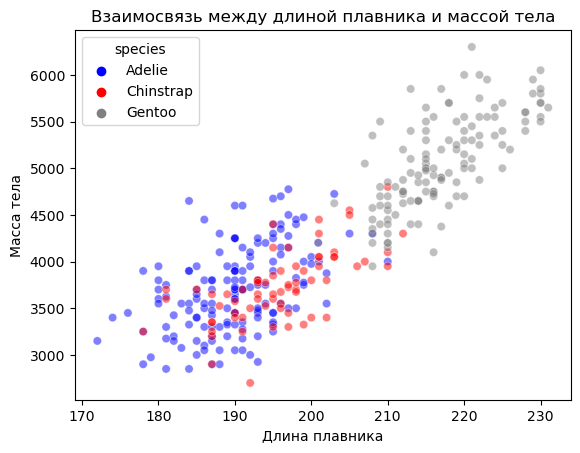

In [60]:
sns.scatterplot(data = penguin , x = 'flipper_length_mm' , y = 'body_mass_g' , hue = 'species' , alpha = 0.5 , palette=['blue','red','grey'])
plt.title("Взаимосвязь между длиной плавника и массой тела")
plt.xlabel("Длина плавника")
plt.ylabel("Масса тела")

Как видно из графика, кажется, что длина плавника и масса тела имеют положительную корреляцию.
Итак,рассчитаем корреляцию этих двух переменных, используя метод ".corr()"

Корреляция между длиной ласт и массой тела составляет 0,87, что указывает на сильную положительную корреляцию двух переменных.
Теперь пришло время сделать модель для предсказания. Нужно импортировать модель «KMeans» из библиотеки sklearn, импортировать функцию train_test_split, чтобы разделить данные для обучения и тестирования.

Зачем нам нужно разделять данные для обучения и тестирования?

В реальной жизни, если вы берете все свои данные для обучения модели и хотите оценить свою модель с помощью данных, которые ваша модель никогда раньше не видела, как вы получаете новые данные?

При работе с реальными проектами я не думаю, что у вас будет много времени для повторного сбора данных для оценки вашей модели из-за крайнего срока.

Вот почему нам нужно разделить данные на два раздела: один для модели обучения, а другой для тестирования или оценки модели.

In [61]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 

Для количества кластеров я установлю количество кластеров равным 3, что эквивалентно видам пингвинов (Adelie, Chinstrap, Gentoo), буду использовать переменную длины плавника и массы тела для построения прогнозирующей модели.

Итак, я создам объект «x» (содержит переменную, используемую для прогнозирования) и «y» (содержит переменную вида, которая будет использоваться позже), затем помещу объекты «x» и «y» в функцию «train_test_split», чтобы разделить данные, где тестовый размер данных равен 20% всех данных и установлю random_state равным любому целому числу.


In [62]:
model = KMeans(n_clusters = 3 , random_state = 120)

x = penguin[['flipper_length_mm', 'body_mass_g']]
y = penguin['species']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2 , random_state = 120)

После разделения данных на 2 раздела я буду использовать метод «.fit()», чтобы подогнать зависимые переменные в модели.

In [63]:
model.fit(x_train)

KMeans(n_clusters=3, random_state=120)

Затем я буду использовать метод «.labels_», чтобы увидеть результат прогнозирования модели, которую я создаю.

In [64]:
model.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1,
       0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2,
       2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0,
       1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1,
       2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1,
       2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2,
       2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0])

Я создам новый столбец и назову его «виды» и поставлю y_test в этот новый столбец, создам новый столбец с именем «predicted_species» и помещу результат прогноза из модели в этот новый столбец.

In [65]:
x_train['species'] = y_train
x_train['predicted_species'] = model.labels_

x_train

,flipper_length_mm,body_mass_g,species,predicted_species
272,210.0,4400.0,Gentoo,0
82,187.0,3800.0,Adelie,2
328,208.0,4575.0,Gentoo,0
271,220.0,5300.0,Gentoo,1
280,208.0,4200.0,Gentoo,0
...,...,...,...,...
10,186.0,3300.0,Adelie,2
223,218.0,5700.0,Gentoo,1
158,178.0,3250.0,Chinstrap,2
256,213.0,4950.0,Gentoo,1


Я создам новый объект с именем «center». Этот объект содержит три числа осей x и y, сгенерированных моделью.
Чтобы получить число, я буду использовать метод ".clustercenters".

In [67]:
center = model.cluster_centers_
print(center)

[[ 205.34285714 4442.9       ]
 [ 220.0877193  5438.15789474]
 [ 190.23880597 3509.14179104]]


Я беру количество осей x и y, а также результат прогнозирования из модели, чтобы сделать визуализацию.
Вот график зависимости между длиной плавника и массой тела. В каждой точке он представляет каждое наблюдение как вид.

По сравнению с предыдущим графиком, который я построила, желтый, красный и серый цвета представляют как Адели, Чинстрап и Генту соответственно. И три числа по осям x и y будут отображаться в виде черного ромба на графике.

Вот как работает модель для предсказания вида пингвинов. После подгонки модели он генерирует количество осей x и y (отображается как черный ромб на графике, и я буду называть это точкой группы)

Модель рассчитает расстояние между каждой точкой данных и групповой точкой. И сгруппирует каждую точку данных в ближайшую групповую точку.

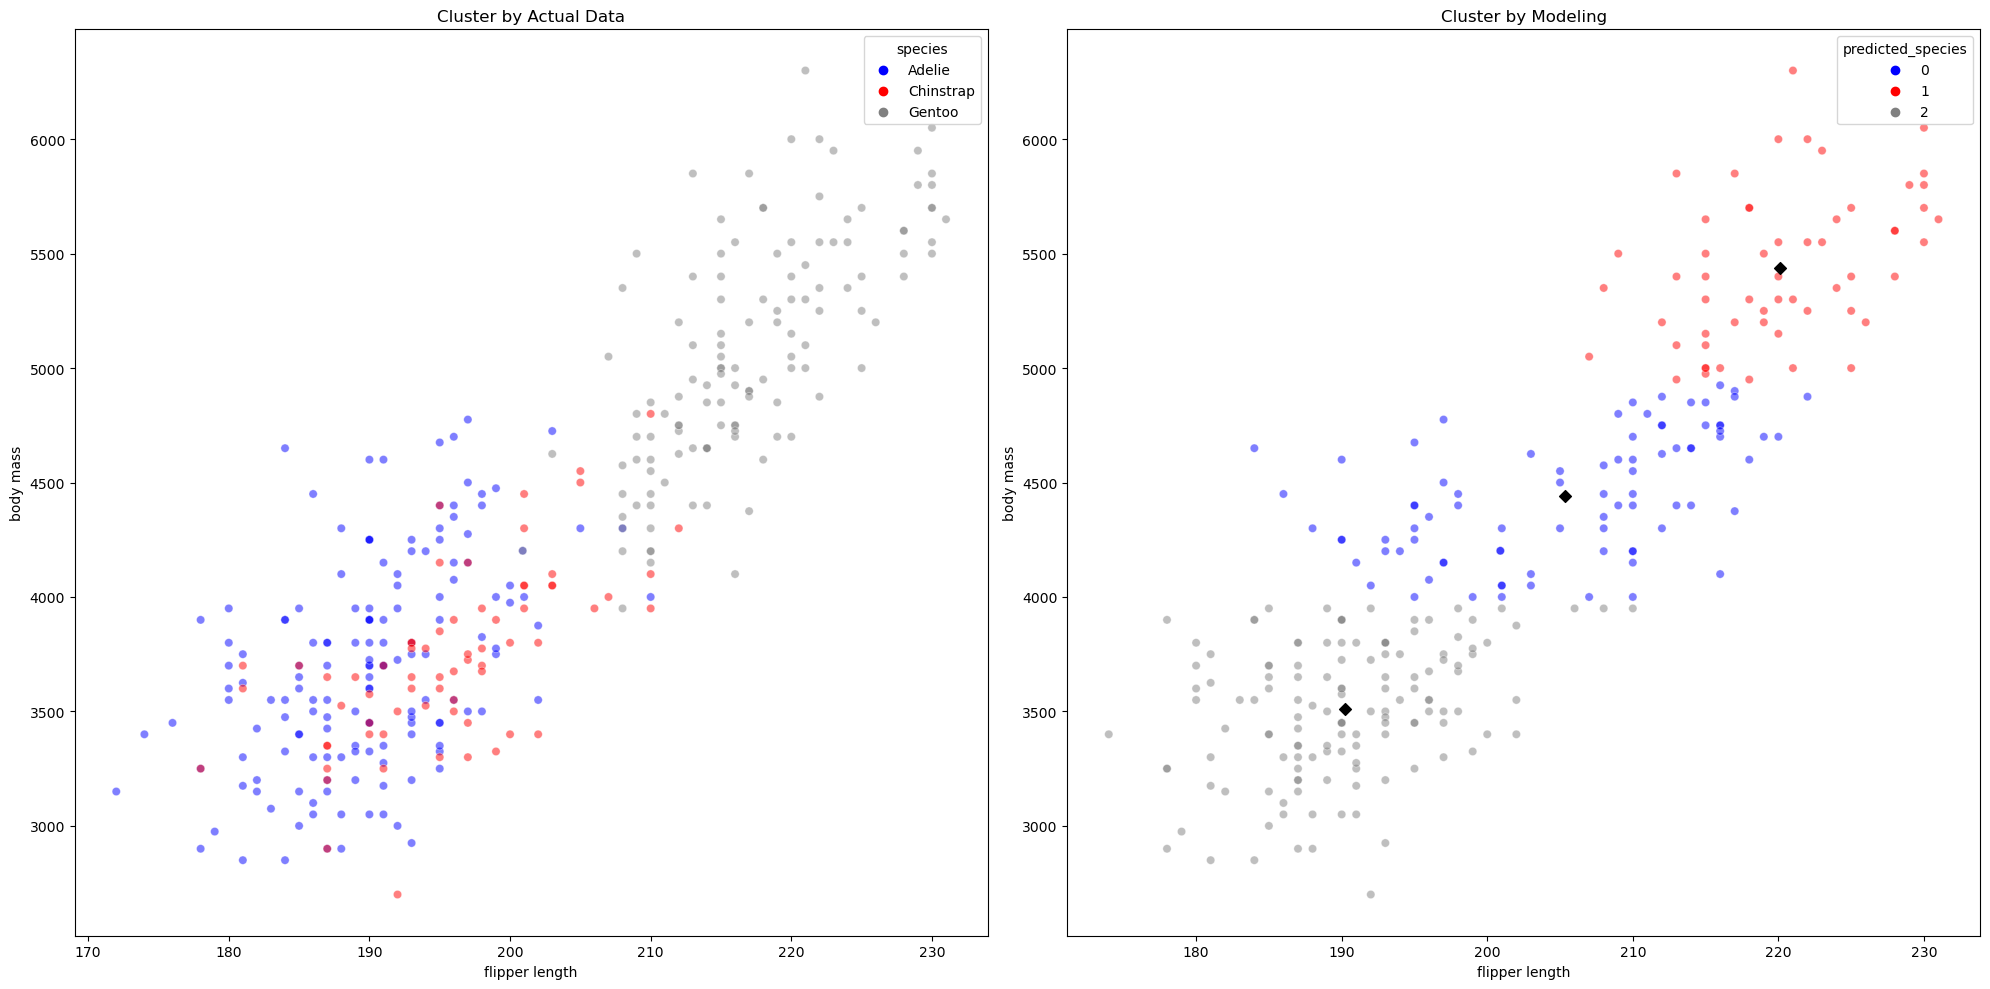

In [68]:
fig,axes = plt.subplots(1,2,figsize=(20,10))

#Actual Data
g1=sns.scatterplot(data = penguin, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species', alpha = 0.5, palette=['blue','red','grey'],ax=axes[0])
g1.set_title('Cluster by Actual Data')
g1.set_xlabel("flipper length")
g1.set_ylabel("body mass")

#Cluster From Model
g2=sns.scatterplot(data=x_train , x = 'flipper_length_mm', y = 'body_mass_g', hue='predicted_species', alpha=0.5, palette=['blue','red','grey'],ax=axes[1])
g2.scatter(x = center[:,0], y = center[:,1], marker = 'D', color = 'black')
g2.set_title('Cluster by Modeling')
g2.set_xlabel("flipper length")
g2.set_ylabel("body mass")
plt.tight_layout()
plt.show()

На предыдущем графике по сравнению с первым, который мы сделали, 0 представлен как Chinstrap, 1 представлен как Gentoo и 2 представлен как Adelie.

Затем я воспользуюсь методом ".replace()", чтобы заменить число в предсказании видов именами видов.

In [70]:
x_train['predicted_species'].replace([0,1,2] , ['Adelie', 'Chinstrap', 'Gentoo'] , inplace=True)
x_train

,flipper_length_mm,body_mass_g,species,predicted_species
272,210.0,4400.0,Gentoo,Chinstrap
82,187.0,3800.0,Adelie,Adelie
328,208.0,4575.0,Gentoo,Chinstrap
271,220.0,5300.0,Gentoo,Gentoo
280,208.0,4200.0,Gentoo,Chinstrap
...,...,...,...,...
10,186.0,3300.0,Adelie,Adelie
223,218.0,5700.0,Gentoo,Gentoo
158,178.0,3250.0,Chinstrap,Adelie
256,213.0,4950.0,Gentoo,Gentoo


Я составлю перекрестную таблицу, чтобы показать, насколько точно наша модель может предсказать результат.

Как видно из таблицы, модель предсказывает, что 91 Адели будут Адели, а 28 Адели - подбородочным ремнем, предсказать, что 38 антарктических ремней будут Адели, а 10 антарктических ремней будут антарктических ипредсказать, что 1 папуасский пингвин будет Адели, 45 папуасских пингвинов будут антарктических и 55 папуасских папуасов будут папуасскими.

In [71]:
pd.crosstab(x_train['species'] ,x_train['predicted_species'])

predicted_species,Adelie,Chinstrap,Gentoo
species,,,
Adelie,91,28,0
Chinstrap,42,11,0
Gentoo,1,45,57


Мы можем рассчитать процент точности нашей модели, используя метод «.mean()».

In [72]:
result = x_train['species'] == x_train['predicted_species']
print(result)

272    False
82      True
328    False
271     True
280    False
       ...  
10      True
223     True
158    False
256     True
167     True
Length: 275, dtype: bool


In [73]:
result.mean()

0.5781818181818181

Мы уже построили модель и рассчитали точность модели. Теперь я буду использовать тестовые данные, чтобы проверить нашу модель, чтобы увидеть производительность модели с использованием невидимых данных.

Для этого я повторю предыдущий процесс.

In [74]:
predict = model.predict(x_test)
print(predict)

[1 2 2 0 2 1 2 2 2 2 2 0 0 0 2 1 2 0 2 2 0 2 2 2 0 0 0 0 0 1 0 2 2 2 2 2 1
 2 0 1 2 2 1 0 1 2 2 1 0 0 0 0 2 1 2 0 0 2 2 1 2 1 2 1 0 0 0 0 0]


In [75]:
x_test['species'] = y_test
x_test['predicted_species'] = predict

x_test

,flipper_length_mm,body_mass_g,species,predicted_species
279,224.0,5550.0,Gentoo,1
55,191.0,3700.0,Adelie,2
34,195.0,3325.0,Adelie,2
99,192.0,4100.0,Adelie,0
1,186.0,3800.0,Adelie,2
...,...,...,...,...
197,201.0,4450.0,Chinstrap,0
81,196.0,4700.0,Adelie,0
113,197.0,4275.0,Adelie,0
338,214.0,4925.0,Gentoo,0


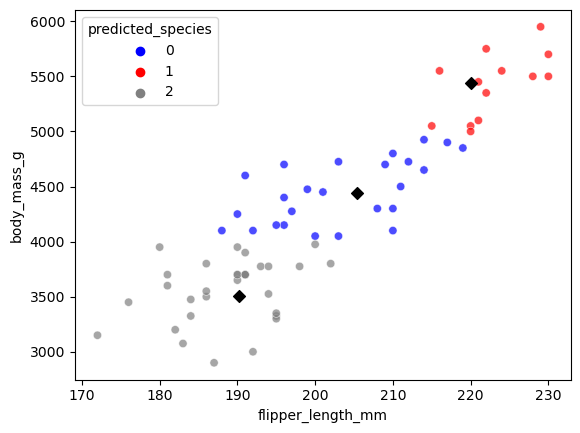

In [76]:
sns.scatterplot(data=x_test , x = 'flipper_length_mm' , y = 'body_mass_g' , hue='predicted_species',alpha=0.7,palette=['blue','red','grey'])
plt.scatter(x=center[:,0] , y=center[:,1] , color = 'black' , marker = 'D')

In [78]:
x_test['predicted_species'].replace([0,1,2],['Adelie','Chinstrap','Gentoo'],inplace=True)
x_test

,flipper_length_mm,body_mass_g,species,predicted_species
279,224.0,5550.0,Gentoo,Gentoo
55,191.0,3700.0,Adelie,Adelie
34,195.0,3325.0,Adelie,Adelie
99,192.0,4100.0,Adelie,Chinstrap
1,186.0,3800.0,Adelie,Adelie
...,...,...,...,...
197,201.0,4450.0,Chinstrap,Chinstrap
81,196.0,4700.0,Adelie,Chinstrap
113,197.0,4275.0,Adelie,Chinstrap
338,214.0,4925.0,Gentoo,Chinstrap


In [79]:
pd.crosstab(x_test['species'] , x_test['predicted_species'])

predicted_species,Adelie,Chinstrap,Gentoo
species,,,
Adelie,21,12,0
Chinstrap,10,5,0
Gentoo,0,8,13


In [80]:
result_test = x_test['species'] == x_test['predicted_species']
print(result_test)

279     True
55      True
34      True
99     False
1       True
       ...  
197     True
81     False
113    False
338    False
160     True
Length: 69, dtype: bool


In [81]:
result_test.mean()

0.5652173913043478

Вот точность нашей модели с использованием тестовых данных. Точность модели составляет 56%.

Вот весь базовый анализ данных с использованием Python, который я хочу вам представить.

Я надеюсь, что этот проект поможет вам лучше понять, как использовать Python для анализа данных, или даст вам некоторые идеи.

о том, как применять Python в своем проекте в повседневной работе.

Спасибо.